In [3]:
import pandas as pd
data = pd.read_csv('hiv_protease_inhibitors_data_chemlb_full.csv')

smiles = list(data['canonical_smiles'])
#smiles

In [4]:
text = " ".join(smiles)
print(len(text))
print(text)

chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder
decode = lambda l: ''.join([itos[i] for i in l]) # decoder

print(encode('CCO'))
print(decode(encode('CCO')))

3616
CC(C)CN(Sc1ccc2c(c1)CCO2)[C@H](CO)CCCCNC(=O)[C@@H](Cc1cccc2ccccc12)NC(=O)N1CCOCC1 CC(C)CN(Sc1ccc2c(c1)OCCO2)[C@H](CO)CCCCNC(=O)[C@@H](Cc1cccc2ccccc12)NC(=O)N1CCOCC1 CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)NC(=O)N1CCOCC1)S(=O)(=O)c1ccc2c(c1)CCO2 Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1 CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)NC(=O)c1cccc(=O)[nH]1)S(=O)(=O)c1ccc(N)cc1 Cc1ccccc1C[C@H](NC(=O)c1cccnc1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1 O=C(O)CNC(=O)c1c(=O)oc(O)c2cc(Br)ccc12 C[C@H](NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F)F)c3)c12)C(=O)O Cc1ccccc1C[C@H](NC(=O)c1cccc(C)c1O)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1 COC(=O)N[C@@H](CC1CCCCC1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1 CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](CC1CCCCC1)NC(=O)c1cccnc1)S(=O)(=O)c1ccc(N)cc1 Cc1ccc(C(=O)N[C@@H](CC2CCCCC2)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c2ccc(N)cc2)cn1 COC(=O)N[C@H](C(=O)NCCCC[C@H](CO)N(CC(C)C)S(=O)(=O)c1cccc2cccnc1

In [3]:
import torch

In [27]:
N = torch.zeros((25, 25), dtype=torch.int32)

In [28]:

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
for s in smiles:
  chs = ['.'] + list(s) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [30]:
stoi

{' ': 1,
 '(': 2,
 ')': 3,
 '-': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '=': 8,
 '@': 9,
 'B': 10,
 'C': 11,
 'F': 12,
 'H': 13,
 'N': 14,
 'O': 15,
 'S': 16,
 '[': 17,
 ']': 18,
 'c': 19,
 'l': 20,
 'n': 21,
 'o': 22,
 'r': 23,
 's': 24,
 '.': 0}

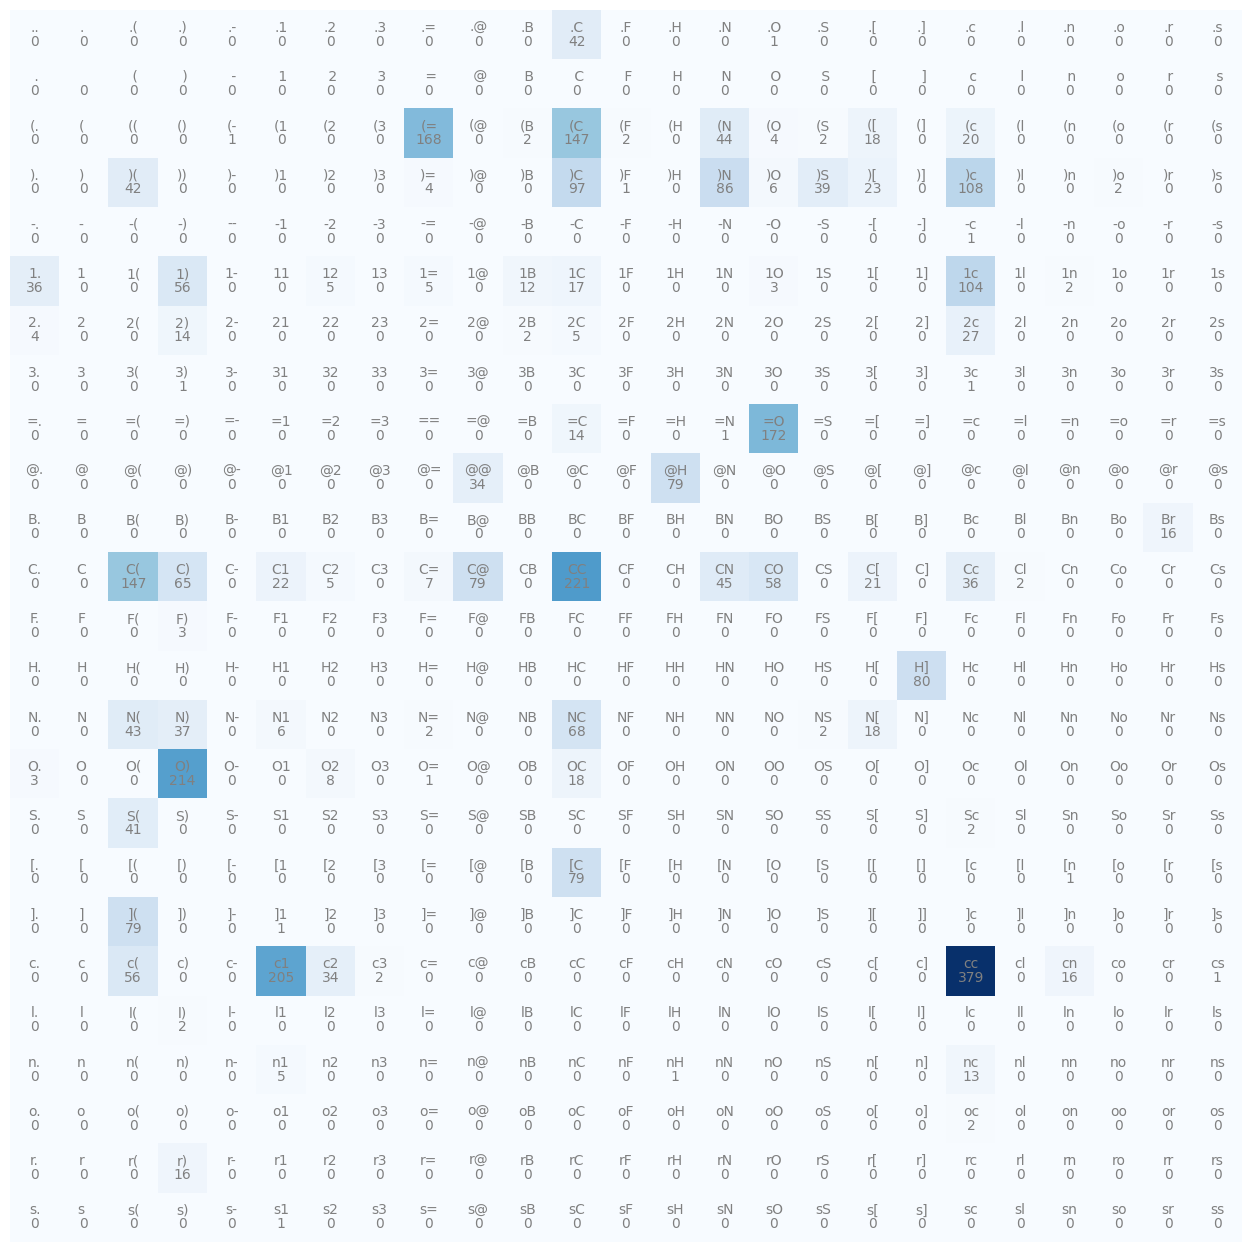

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(25):
    for j in range(25):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

In [10]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.9767, 0.0000, 0.0000, 0.0000, 0.0233, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [11]:
#the generator 
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'C'

In [12]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [13]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [15]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [16]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

Cccc(=C@H](C@H.
S(=OCO)(C(N[CC@@H]lO)cccccc1c1.
C@H](C)C@H](=O)C)C@(-n@H]r@H](Ccc1c1)(=O)S(=O2cc1nH](C2O)lnHB](=O)cc1B=O)S3[C)O)c1cc1Br)S(C(=O)S(=O)CCOC@Hr)N(N(=O)ScNCcc2)=O)c1cc2-3O)c(N)S 3@H](C@H](CC@H-l.
CCN(CC(=O)S(=CC@HHB1)cc1)C@onccccc1)=O)CCC(CC(CC=r)ccc(=O)S(=O2(NF=O)cc(=O)cccc(CC=O)c1)N[r l.
C(=O-sBs2cccc(=OC@H] FO1)SooNCN)(CC2B(C(N1ccc2cc1ccccc1.


In [9]:
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]


batch_size = 64 
block_size = 256 
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2


# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [11]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
for s in smiles:
  chs = ['.'] + list(s) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]


In [12]:
xs, ys = [], []
for s in smiles:
  chs = ['.'] + list(s) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  3617


In [13]:
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.93105149269104


In [14]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

KeyError: 25

In [22]:
#Simple transformer model

import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tqdm import tqdm

import pandas as pd
data = pd.read_csv('hiv_protease_inhibitors_data_chemlb_full.csv')

smiles = list(data['canonical_smiles'])
#smiles

text = " ".join(smiles)
chars = sorted(list(set(text)))
vocab_size = len(chars)

stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])



In [7]:
# data loading (separate train and validation sets)

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [51]:
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

In [29]:
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [53]:
# model 

class SMILESTransformer(nn.Module):
    def __init__(self, vocab_size, n_embd, n_head, n_layer, dropout):
        super(SMILESTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, n_embd)
        self.transformer = nn.Transformer(n_embd, n_head, n_layer, dropout=dropout)
        self.fc = nn.Linear(n_embd, vocab_size)
        self.log_softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x, x)
        x = self.fc(x)
        x = self.log_softmax(x) 
        return x
    
    def generate(self, idx, max_new_tokens, block_size):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :]  # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)  # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1)  # (B, T+1)
        return idx
    

model = SMILESTransformer(vocab_size, n_embd, n_head, n_layer, dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [34]:
def estimate_loss():
    losses = {}
    for split in ['train', 'val']:
        x, y = get_batch(split)
        output = model(x)
        loss = criterion(output.view(-1, vocab_size), y.view(-1))
        losses[split] = loss.item()
    return losses

In [54]:
for iter in tqdm(range(max_iters)):
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # Sample a batch of data
    xb, yb = get_batch('train')

    # Evaluate the loss
    output = model(xb)
    loss = criterion(output.view(-1, vocab_size), yb.view(-1))

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

  0%|          | 0/5000 [00:00<?, ?it/s]

step 0: train loss 3.3297, val loss 3.3009


  2%|▏         | 100/5000 [00:31<24:48,  3.29it/s]

step 100: train loss 1.2783, val loss 1.3621


  4%|▍         | 200/5000 [01:02<21:45,  3.68it/s]

step 200: train loss 1.2466, val loss 1.3558


  6%|▌         | 300/5000 [01:30<22:11,  3.53it/s]

step 300: train loss 1.2772, val loss 1.3986


  8%|▊         | 400/5000 [01:59<20:45,  3.69it/s]

step 400: train loss 1.3128, val loss 1.2460


 10%|█         | 500/5000 [02:27<20:31,  3.65it/s]

step 500: train loss 1.2454, val loss 1.5898


 12%|█▏        | 600/5000 [02:57<20:21,  3.60it/s]

step 600: train loss 1.2392, val loss 1.3122


 14%|█▍        | 700/5000 [03:25<21:04,  3.40it/s]

step 700: train loss 1.2102, val loss 1.3170


 16%|█▌        | 800/5000 [03:53<20:43,  3.38it/s]

step 800: train loss 1.2772, val loss 1.3796


 18%|█▊        | 900/5000 [04:27<22:57,  2.98it/s]

step 900: train loss 1.3462, val loss 1.3392


 20%|██        | 1000/5000 [05:00<20:17,  3.29it/s]

step 1000: train loss 1.2027, val loss 1.5558


 22%|██▏       | 1100/5000 [05:33<18:05,  3.59it/s]

step 1100: train loss 1.2583, val loss 1.3805


 24%|██▍       | 1200/5000 [06:01<15:11,  4.17it/s]

step 1200: train loss 1.1976, val loss 1.3787


 26%|██▌       | 1300/5000 [06:26<15:41,  3.93it/s]

step 1300: train loss 1.1988, val loss 1.3261


 28%|██▊       | 1400/5000 [06:52<15:22,  3.90it/s]

step 1400: train loss 1.1533, val loss 1.2778


 30%|███       | 1500/5000 [07:17<14:25,  4.04it/s]

step 1500: train loss 1.2917, val loss 1.2433


 32%|███▏      | 1600/5000 [07:50<17:14,  3.29it/s]

step 1600: train loss 1.2594, val loss 1.4740


 34%|███▍      | 1700/5000 [08:19<16:24,  3.35it/s]

step 1700: train loss 1.3112, val loss 1.2294


 36%|███▌      | 1800/5000 [08:52<14:36,  3.65it/s]

step 1800: train loss 1.1928, val loss 1.2111


 38%|███▊      | 1900/5000 [09:21<14:18,  3.61it/s]

step 1900: train loss 1.3425, val loss 1.2929


 40%|████      | 2000/5000 [09:48<12:34,  3.98it/s]

step 2000: train loss 1.2222, val loss 1.3376


 42%|████▏     | 2100/5000 [10:14<12:05,  3.99it/s]

step 2100: train loss 1.2477, val loss 1.4261


 44%|████▍     | 2200/5000 [10:40<12:11,  3.83it/s]

step 2200: train loss 1.2466, val loss 1.3803


 46%|████▌     | 2300/5000 [11:06<11:22,  3.96it/s]

step 2300: train loss 1.2344, val loss 1.4180


 48%|████▊     | 2400/5000 [11:34<11:09,  3.88it/s]

step 2400: train loss 1.2112, val loss 1.3337


 50%|█████     | 2500/5000 [11:59<10:39,  3.91it/s]

step 2500: train loss 1.2456, val loss 1.3464


 52%|█████▏    | 2600/5000 [12:28<09:58,  4.01it/s]

step 2600: train loss 1.2025, val loss 1.3550


 54%|█████▍    | 2700/5000 [12:54<09:39,  3.97it/s]

step 2700: train loss 1.2895, val loss 1.3266


 56%|█████▌    | 2800/5000 [13:20<09:13,  3.97it/s]

step 2800: train loss 1.2346, val loss 1.3353


 58%|█████▊    | 2900/5000 [13:46<09:09,  3.83it/s]

step 2900: train loss 1.2898, val loss 1.4203


 60%|██████    | 3000/5000 [14:13<08:28,  3.93it/s]

step 3000: train loss 1.2330, val loss 1.4548


 62%|██████▏   | 3100/5000 [14:38<08:18,  3.81it/s]

step 3100: train loss 1.2510, val loss 1.2513


 64%|██████▍   | 3200/5000 [15:10<09:41,  3.09it/s]

step 3200: train loss 1.2174, val loss 1.4497


 66%|██████▌   | 3300/5000 [15:42<08:27,  3.35it/s]

step 3300: train loss 1.2718, val loss 1.4428


 68%|██████▊   | 3400/5000 [16:11<06:41,  3.99it/s]

step 3400: train loss 2.5256, val loss 2.5204


 70%|███████   | 3500/5000 [16:36<06:31,  3.84it/s]

step 3500: train loss 2.4115, val loss 2.3400


 72%|███████▏  | 3600/5000 [17:01<05:46,  4.04it/s]

step 3600: train loss 2.4557, val loss 2.3376


 74%|███████▍  | 3700/5000 [17:26<05:27,  3.97it/s]

step 3700: train loss 2.3466, val loss 2.4105


 76%|███████▌  | 3800/5000 [17:51<06:11,  3.23it/s]

step 3800: train loss 2.4371, val loss 2.3030


 78%|███████▊  | 3900/5000 [18:18<04:30,  4.07it/s]

step 3900: train loss 2.4342, val loss 2.3824


 80%|████████  | 4000/5000 [18:44<04:09,  4.01it/s]

step 4000: train loss 2.4307, val loss 2.3841


 82%|████████▏ | 4100/5000 [19:10<03:59,  3.75it/s]

step 4100: train loss 2.4665, val loss 2.3644


 84%|████████▍ | 4200/5000 [19:37<03:38,  3.66it/s]

step 4200: train loss 2.4317, val loss 2.2472


 86%|████████▌ | 4300/5000 [20:11<04:01,  2.90it/s]

step 4300: train loss 2.3354, val loss 2.3822


 88%|████████▊ | 4400/5000 [20:45<03:20,  2.99it/s]

step 4400: train loss 2.4290, val loss 2.4309


 90%|█████████ | 4500/5000 [21:20<02:11,  3.80it/s]

step 4500: train loss 2.4195, val loss 2.3571


 92%|█████████▏| 4600/5000 [21:48<01:57,  3.40it/s]

step 4600: train loss 2.4225, val loss 2.4100


 94%|█████████▍| 4700/5000 [22:19<01:29,  3.37it/s]

step 4700: train loss 2.4382, val loss 2.4364


 96%|█████████▌| 4800/5000 [22:47<00:56,  3.54it/s]

step 4800: train loss 2.4300, val loss 2.3830


 98%|█████████▊| 4900/5000 [23:18<00:28,  3.53it/s]

step 4900: train loss 2.4450, val loss 2.3504


100%|█████████▉| 4999/5000 [23:47<00:00,  3.35it/s]

step 4999: train loss 2.4200, val loss 2.3497


100%|██████████| 5000/5000 [23:47<00:00,  3.50it/s]


In [41]:

for iteration in range(1, max_iters + 1):
    model.train()
    x, y = get_batch('train')
    output = model(x)
    loss = criterion(output.view(-1, vocab_size), y.view(-1))
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iteration % eval_interval == 0:
        model.eval()
        with torch.no_grad():
            x_val, y_val = get_batch('val')
            output_val = model(x_val)
            val_loss = criterion(output_val.view(-1, vocab_size), y_val.view(-1))
            print(f"Iteration {iteration}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")






Iteration 10, Training Loss: 2.5232, Validation Loss: 2.4138
Iteration 20, Training Loss: 2.4091, Validation Loss: 2.3783
Iteration 30, Training Loss: 2.4322, Validation Loss: 2.3851
Iteration 40, Training Loss: 2.4475, Validation Loss: 2.3858
Iteration 50, Training Loss: 2.3698, Validation Loss: 2.3415
Iteration 60, Training Loss: 2.4699, Validation Loss: 2.3745
Iteration 70, Training Loss: 2.3758, Validation Loss: 2.2076
Iteration 80, Training Loss: 1.9765, Validation Loss: 1.8319
Iteration 90, Training Loss: 1.4761, Validation Loss: 1.4787
Iteration 100, Training Loss: 1.4123, Validation Loss: 1.2602


In [36]:
# Evaluating the loss function
model.eval()
with torch.no_grad():
    val_input = val_data[:-1].unsqueeze(0)
    val_target = val_data[1:].unsqueeze(0)
    val_output = model(val_input)
    val_loss = criterion(val_output.squeeze(0), val_target.squeeze(0))
    print(f"Validation Loss: {val_loss.item():.4f}")

Validation Loss: 1.3841


In [55]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
generated_sequence = model.generate(context, max_new_tokens=500, block_size=block_size)
sequence = decode(generated_sequence[0].tolist())

In [ ]:
sequence = decode(generated_sequence[0].tolist())

In [56]:
#sequence = sequence.replace('.', '')
sequence = sequence.split(' ')
sequence

['',
 'c([(N)c[))=cB(ccc(CNO[CC=)O1((CcCcC(CCc(B2=C)C)ScN(3ccC]c)oNOC@1CCcC@OCO()@NONCccc@)@[)(((CcC2C(1c))(@1[C',
 '(CC[)])(OCCC)OC(CNC)))c()=BC1O',
 'OCcC)c2N(NOCNCc)C)C(CCC(2)S))=cCc)c@N@',
 'crcS(cN)cccc1(cOO1CcrF)()C@C(]1c@2[OO(cCOCC(CcN)Oc()()@cc)O(=CO@)O@@[)CO[11NccC=c1OO(CCNO)(cCcCC))c]H1cHCC(=c()CO1H1(ccC1COOC)C@NCc)O[N11C1()1)2HOO2rCO()Cc1c)O(()C=(O=()CC=(((C1Cc',
 'cOC(SO(CCNcN=Ccc1()ccCC',
 'N11()cCccNcHcCc)cccc)cnS()C)(CCc@NC(ONc1)1CSC)11cB1NO1)(1CC)HC(C[]=c1C(NnO)[)1nO(@ccC)(1c',
 ')c(OCCnc@(CCC@(c@(=(c1c(c(cCc',
 '']

In [57]:
sequence = [s for s in sequence if len(s) > 2]
sequence

['c([(N)c[))=cB(ccc(CNO[CC=)O1((CcCcC(CCc(B2=C)C)ScN(3ccC]c)oNOC@1CCcC@OCO()@NONCccc@)@[)(((CcC2C(1c))(@1[C',
 '(CC[)])(OCCC)OC(CNC)))c()=BC1O',
 'OCcC)c2N(NOCNCc)C)C(CCC(2)S))=cCc)c@N@',
 'crcS(cN)cccc1(cOO1CcrF)()C@C(]1c@2[OO(cCOCC(CcN)Oc()()@cc)O(=CO@)O@@[)CO[11NccC=c1OO(CCNO)(cCcCC))c]H1cHCC(=c()CO1H1(ccC1COOC)C@NCc)O[N11C1()1)2HOO2rCO()Cc1c)O(()C=(O=()CC=(((C1Cc',
 'cOC(SO(CCNcN=Ccc1()ccCC',
 'N11()cCccNcHcCc)cccc)cnS()C)(CCc@NC(ONc1)1CSC)11cB1NO1)(1CC)HC(C[]=c1C(NnO)[)1nO(@ccC)(1c',
 ')c(OCCnc@(CCC@(c@(=(c1c(c(cCc']

# New text 

In [6]:
import pandas as pd
data = pd.read_csv('hiv_protease_inhibitors_data_chemlb_full.csv')

smiles = data['canonical_smiles']
#print(len(smiles))

text = str(smiles)
print(len(text))
print(text)

chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode('CCO'))
print(decode(encode('CCO')))


2445
0     CC(C)CN(Sc1ccc2c(c1)CCO2)[C@H](CO)CCCCNC(=O)[C...
1     CC(C)CN(Sc1ccc2c(c1)OCCO2)[C@H](CO)CCCCNC(=O)[...
2     CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...
3     Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCC...
4     CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...
5     Cc1ccccc1C[C@H](NC(=O)c1cccnc1)C(=O)NCCCC[C@@H...
6                O=C(O)CNC(=O)c1c(=O)oc(O)c2cc(Br)ccc12
7     C[C@H](NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F...
8     Cc1ccccc1C[C@H](NC(=O)c1cccc(C)c1O)C(=O)NCCCC[...
9     COC(=O)N[C@@H](CC1CCCCC1)C(=O)NCCCC[C@@H](CO)N...
10    CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](CC1CCCCC1)NC(...
11    Cc1ccc(C(=O)N[C@@H](CC2CCCCC2)C(=O)NCCCC[C@@H]...
12    COC(=O)N[C@H](C(=O)NCCCC[C@H](CO)N(CC(C)C)S(=O...
13    CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Cl)N...
14    Cc1ncccc1C(=O)N[C@@H](Cc1ccccc1Cl)C(=O)NCCCC[C...
15    CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](CC1=C(Br)CCC=...
16    COC(=O)N[C@H](C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=...
17    CC(C)CN([C@H](CO)CCCCNC(=O)[C@@H](NC(

In [7]:
def separate(s):
    stack = []
    sections = []
    for i, c in enumerate(s):
        if c in ['(', '[']:
            stack.append((c, i))
        elif c in [')', ']']:
            while stack:
                opening, start = stack[-1]  # Peek at the top of the stack
                if (opening == '(' and c == ')') or (opening == '[' and c == ']'):
                    stack.pop()  # Remove the matching opening bracket
                    sections.append((start, i))
                    break
                else:
                    stack.pop()  # Remove the non-matching opening bracket

    # Filter out overlapping sections
    non_overlapping_sections = []
    last_end = -1
    for start, end in sorted(sections, key=lambda x: x[0]):
        if start > last_end:
            non_overlapping_sections.append((start, end))
            last_end = end

    return non_overlapping_sections


def show_sections(s, sections):
    all_sections = []
    last_end = 0  # To keep track of the last section's end index

    for start, end in sections:
        if start > last_end:
            # Add the section between the last end and this start
            all_sections.append(s[last_end:start])
        # Add the section within the current parenthesis/bracket
        all_sections.append(s[start:end+1])
        last_end = end + 1  # Update the last end index

    # Handle any remaining section after the last parenthesis/bracket
    if last_end < len(s):
        all_sections.append(s[last_end:])

    return all_sections

s = smiles[0]
sections = separate(s)
all_sections = show_sections(s, sections)
" ".join(all_sections)

'CC (C) CN (Sc1ccc2c(c1)CCO2) [C@H] (CO) CCCCNC (=O) [C@@H] (Cc1cccc2ccccc12) NC (=O) N1CCOCC1'

In [8]:
text = ""

for s in smiles:
    sections = separate(s)
    all_sections = show_sections(s, sections)
    text += " ".join(all_sections)
    text += "*"

In [24]:
chars = sorted(list(set(text)))
vocab_size = len(chars)


stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])


In [19]:
#print(text)

CC (C) CN (Sc1ccc2c(c1)CCO2) [C@H] (CO) CCCCNC (=O) [C@@H] (Cc1cccc2ccccc12) NC (=O) N1CCOCC1*CC (C) CN (Sc1ccc2c(c1)OCCO2) [C@H] (CO) CCCCNC (=O) [C@@H] (Cc1cccc2ccccc12) NC (=O) N1CCOCC1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)NC(=O)N1CCOCC1) S (=O) (=O) c1ccc2c (c1) CCO2*Cc1c (O) cccc1C (=O) N [C@@H] (Cc1ccccc1Br) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)NC(=O)c1cccc(=O)[nH]1) S (=O) (=O) c1ccc (N) cc1*Cc1ccccc1C [C@H] (NC(=O)c1cccnc1) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*O=C (O) CNC (=O) c1c (=O) oc (O) c2cc (Br) ccc12*C [C@H] (NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F)F)c3)c12) C (=O) O*Cc1ccccc1C [C@H] (NC(=O)c1cccc(C)c1O) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*COC (=O) N [C@@H] (CC1CCCCC1) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@H](CC1CCCCC1)NC(=O)c1cccnc1) S (=O) (=O) c1ccc (N) cc1*Cc1ccc (C(=O)N[C@@H](

In [30]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)


# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
val = decode(m.generate(context, max_new_tokens=2000)[0].tolist())

0.204569 M parameters
step 0: train loss 3.3295, val loss 3.3208
step 100: train loss 1.1734, val loss 1.2094
step 200: train loss 0.8397, val loss 0.9493
step 300: train loss 0.6225, val loss 0.7754
step 400: train loss 0.5037, val loss 0.7063
step 500: train loss 0.4472, val loss 0.6486
step 600: train loss 0.4220, val loss 0.6454
step 700: train loss 0.3484, val loss 0.5939
step 800: train loss 0.3314, val loss 0.5898
step 900: train loss 0.3047, val loss 0.5292
step 1000: train loss 0.2757, val loss 0.5481
step 1100: train loss 0.2777, val loss 0.5926
step 1200: train loss 0.2406, val loss 0.6137
step 1300: train loss 0.2435, val loss 0.5870
step 1400: train loss 0.2308, val loss 0.6095
step 1500: train loss 0.2335, val loss 0.6161
step 1600: train loss 0.2265, val loss 0.5928
step 1700: train loss 0.2284, val loss 0.6128
step 1800: train loss 0.2180, val loss 0.6133
step 1900: train loss 0.2118, val loss 0.5491
step 1999: train loss 0.2137, val loss 0.6674


In [31]:
val = decode(m.generate(context, max_new_tokens=2000)[0].tolist())

In [32]:
print(val)

 [C@@H] (Cc1ccccc1Cl) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*COC (=O) N [C@H] (C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c2ccc(N)cc2) cn1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@@H](Sc1cccc2ccc(N)c1) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) cc1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@@H](NC(=O)NCc1ccncn1)C(c1ccccc1)c1ccccc1) S (=O) (=O) c1ccc (N) cc1*Cc1ncccc1C (=O) N [C@@H] (Cc1ccccc1Br) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1c (N) ccc1*Cc1ncccc1C (=O)N [C@@H] (Cc1cccc2ccccc2cc1) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=O) (=O) c1ccc (N) oc (O) c1ccc2c (c1) OCO2*COC (=O) N [C@H] (C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc2) c1O*COC (=O) N [C@H] (C(=O)NCCCC[C@@H](NC(=O)NCC1C)C(C)C) S (=O) (=O) c1ccc2c (c1) CCO2*COC (=O) N [C@@H] (Cc1ccc2ccccc2ccc12) NC (=O) N1CCCOC1*CC (C) CN ([C@H](CO)CCCCNC(=O)[C@H](Cc1cccc2ccccc12) NC (=O) N1CCOCC1*CC (C) CN (Sc1ccc2c(c1)OCO2) N [C@H] (CO) CCCCNC (=O) [C@@H] (Cc1ccccc1Br) C (=O) NCCCC [C@@H] (CO) N (CC(C)C) S (=

In [33]:
new = "".join(val)
new = new.split('*')

new = [s for s in new if len(s) > 2]

new = [s.replace(' ', '') for s in new]
new

['[C@@H](Cc1ccccc1Cl)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1',
 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c2ccc(N)cc2)cn1',
 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@@H](Sc1cccc2ccc(N)c1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1',
 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@@H](NC(=O)NCc1ccncn1)C(c1ccccc1)c1ccccc1)S(=O)(=O)c1ccc(N)cc1',
 'Cc1ncccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1c(N)ccc1',
 'Cc1ncccc1C(=O)N[C@@H](Cc1cccc2ccccc2cc1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)oc(O)c1ccc2c(c1)OCO2',
 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc2)c1O',
 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](NC(=O)NCC1C)C(C)C)S(=O)(=O)c1ccc2c(c1)CCO2',
 'COC(=O)N[C@@H](Cc1ccc2ccccc2ccc12)NC(=O)N1CCCOC1',
 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)N1CCOCC1',
 'CC(C)CN(Sc1ccc2c(c1)OCO2)N[C@H](CO)CCCCNC(=O)[C@@H](Cc1ccccc1Br)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1',
 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](CCc1cccBr)NC(=O)N1CCOCC1)S(=O)(=

[18:03:06] SMILES Parse Error: unclosed ring for input: 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c2ccc(N)cc2)cn1'
[18:03:06] SMILES Parse Error: extra open parentheses for input: 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@@H](Sc1cccc2ccc(N)c1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc1'
[18:03:06] Can't kekulize mol.  Unkekulized atoms: 37 38 40 41 42
[18:03:06] SMILES Parse Error: unclosed ring for input: 'Cc1ncccc1C(=O)N[C@@H](Cc1cccc2ccccc2cc1)C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)oc(O)c1ccc2c(c1)OCO2'
[18:03:06] SMILES Parse Error: unclosed ring for input: 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](CO)N(CC(C)C)S(=O)(=O)c1ccc(N)cc2)c1O'
[18:03:06] SMILES Parse Error: unclosed ring for input: 'COC(=O)N[C@H](C(=O)NCCCC[C@@H](NC(=O)NCC1C)C(C)C)S(=O)(=O)c1ccc2c(c1)CCO2'
[18:03:06] SMILES Parse Error: unclosed ring for input: 'COC(=O)N[C@@H](Cc1ccc2ccccc2ccc12)NC(=O)N1CCCOC1'
[18:03:06] SMILES Parse Error: extra open parentheses for input: 'CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1cccc2ccc

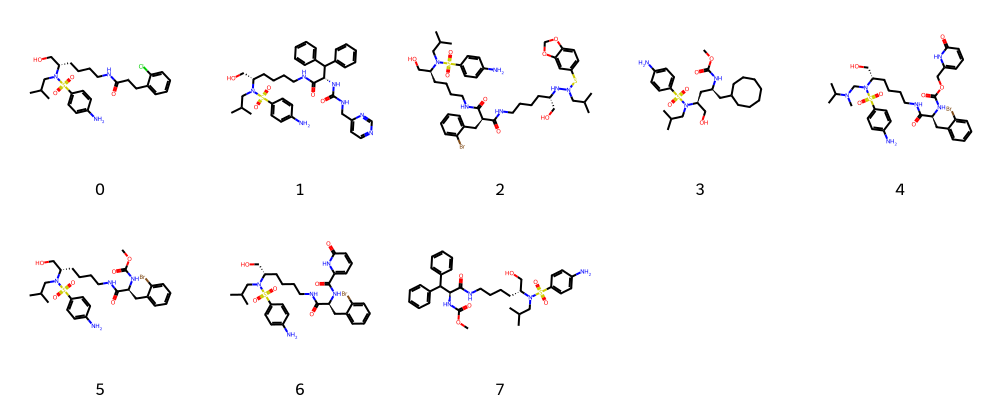

In [34]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


mols = [Chem.MolFromSmiles(smi) for smi in new if Chem.MolFromSmiles(smi) is not None]
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=[str(i) for i in range(len(mols))])


[03:59:21] SMILES Parse Error: syntax error while parsing: 
[03:59:21] SMILES Parse Error: Failed parsing SMILES '
' for input: '
'
[03:59:21] SMILES Parse Error: syntax error while parsing: 3
[03:59:21] SMILES Parse Error: Failed parsing SMILES '3' for input: '3'
[03:59:21] SMILES Parse Error: syntax error while parsing: .
[03:59:21] SMILES Parse Error: Failed parsing SMILES '.' for input: '.'
[03:59:21] SMILES Parse Error: syntax error while parsing: .
[03:59:21] SMILES Parse Error: Failed parsing SMILES '.' for input: '.'
[03:59:21] SMILES Parse Error: syntax error while parsing: 
[03:59:21] SMILES Parse Error: Failed parsing SMILES '
' for input: '
'
[03:59:21] SMILES Parse Error: syntax error while parsing: 8
[03:59:21] SMILES Parse Error: Failed parsing SMILES '8' for input: '8'
[03:59:21] SMILES Parse Error: syntax error while parsing: 
[03:59:21] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[03:59:21] SMILES Parse Error: syntax error while parsing: 
[03:59:21] S

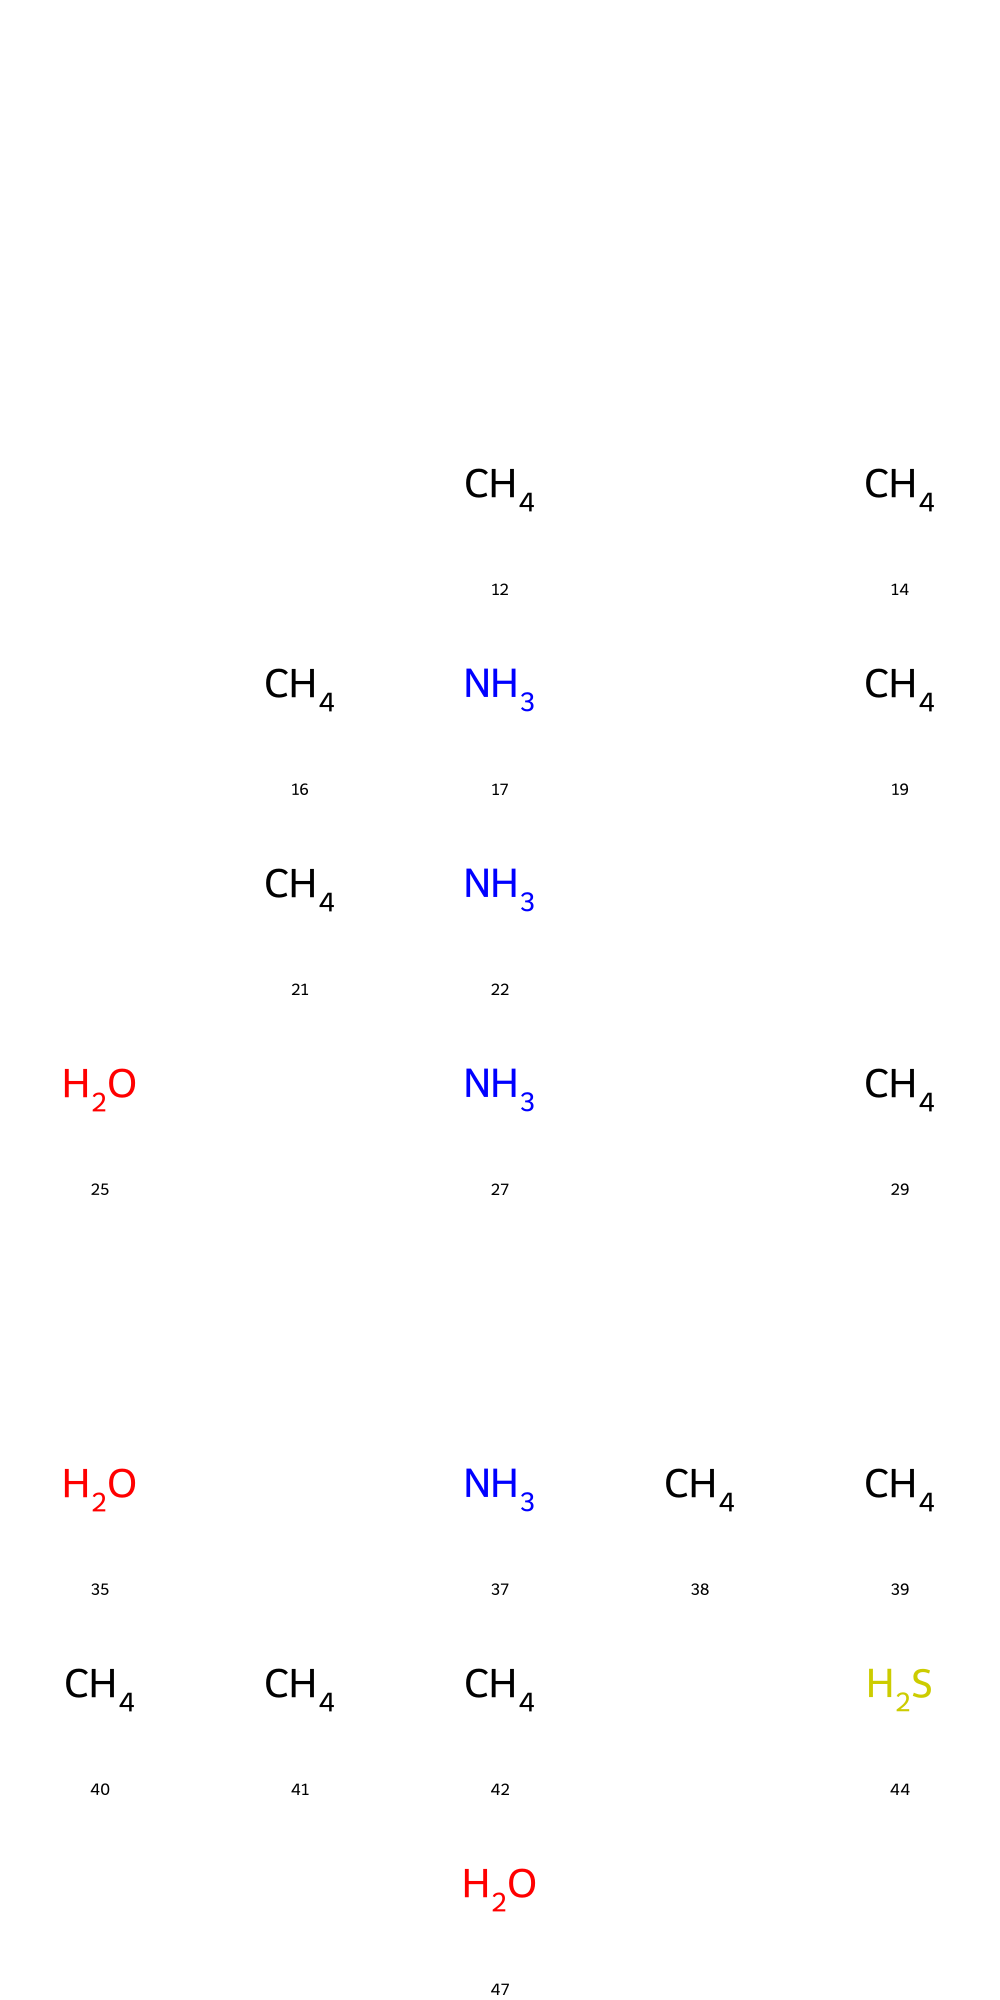

In [8]:
for i in mols:
    print(i)

except:
if i == None:                                                   

    